## Optimization Methods, Homework №4 - Demidov Andrei

#### TASK 1a

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from IPython.display import display

import warnings
warnings.simplefilter('ignore')

np.random.seed(42)

n = 5
m = 2
A = np.random.rand(n, m)
b = 4 * np.random.rand(m)
Q = A.T.dot(A)

# important parameters of the problem
eigs = np.linalg.eigvals(Q)
L = max(eigs)
mu = min(eigs)

def optim_func(x,):
    return 1/2 * (Q @ ())

# minimum
x_star = -np.linalg.inv(Q).dot(b)
# some initial point
x_0 = x_star - [8, -1.5]

def quad(Q, b, x):
    return ( 0.5 * Q.dot(x) + b).dot(x)
def quad_grad(Q, b, x):
    return Q.dot(x) + b
# auxilarily function for contour lines
def quad_2d_XY(Q, b, X, Y):
    Z = np.zeros(shape = X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = quad(Q, b, (X[i,j], Y[i,j]))
    return Z




The optimal solution is:

In [2]:
x_star

array([ 4.68399741, -3.91749557])

According to the task there is a need to derive the formulae for step-size from one-dimensional optimization problem:

$$
f(x + \gamma p) = \frac{1}{2}(Q (x + \gamma p), x + \gamma p) + (c, x + \gamma p) \rightarrow min_{y \in R}
$$

Let's rewrite it it in the following form:

$$
f(x + \gamma p) = \frac{1}{2}(x + \gamma p)^T Q (x + \gamma p) + c^T (x + \gamma p)
$$

Opening the brackets and doing calculation, there is the following expression:

$$
f(x + \gamma p) = f(x) - \gamma d^T d + \frac{1}{2} \gamma^2 d^T Q d, \text{ where } d = \nabla f(x)
$$

Optimizing the value of $\gamma$, there is the following result:

$$
\gamma = \frac{d^T d}{d^T Q d}
$$

Hence, the next point in the iteration is:

$$
x_{new} = x + \gamma d = x + \frac{d^T d}{d^T Q d} d
$$

In [3]:
def gradient_descend_line_search(x0, func, func_grad, Q, b, eps=1e-5):
    x_val = []
    y_val = []
    x = x0.copy()
    x_val.append(x)
    y_val.append(func(Q, b, x))
    old_x = x0.copy()
    iteration = 1
    while True:
        alpha = (func_grad(Q,b,x).T @ func_grad(Q,b,x)) / (func_grad(Q,b,x).T @ Q @ func_grad(Q,b,x))
        old_x = x.copy()
        x = x - alpha * func_grad(Q,b,x)
        x_val.append(x)
        y_val.append(func(Q, b, x))
        iteration+=1
        if np.linalg.norm(x-old_x) < eps:
            print("The number of iterations: ",iteration)
            return {"x_k": x_val, "f_k": y_val}
        
        

The first five points and function values and the last five points and function values are provided below in the table.

In [4]:
df = pd.DataFrame(data=gradient_descend_line_search(x_0, quad, quad_grad, Q, b))

with pd.option_context('display.max_rows',10):
    display(df)

The number of iterations:  26


,x_k,f_k
0,"[-3.316002589365503, -2.417495571619972]",13.998974
1,"[-1.18874583076534, -0.29995147868685246]",0.066793
2,"[1.8909818794788507, -3.3938051595282865]",-4.797307
3,"[2.633664525169609, -2.654513467094651]",-6.495495
4,"[3.708880440974916, -3.7346611398088005]",-7.088378
...,...,...
21,"[4.6838394042445115, -3.91739824145258]",-7.406400
22,"[4.683922264440783, -3.917481481708651]",-7.406400
23,"[4.683942246346841, -3.9174615910363255]",-7.406400
24,"[4.683971175073727, -3.917490652452328]",-7.406400


The number of iterations:  26
Function value in optimal point (minimum), f* = -7.406399665468871


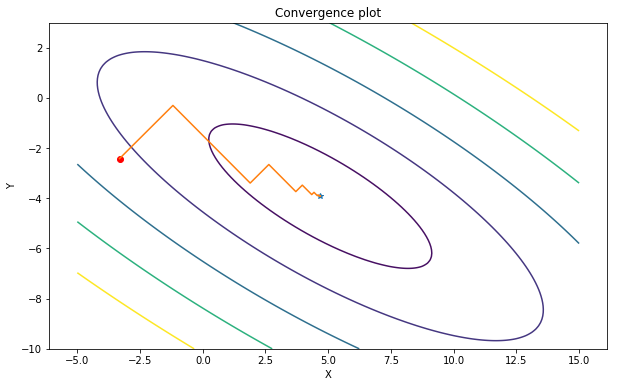

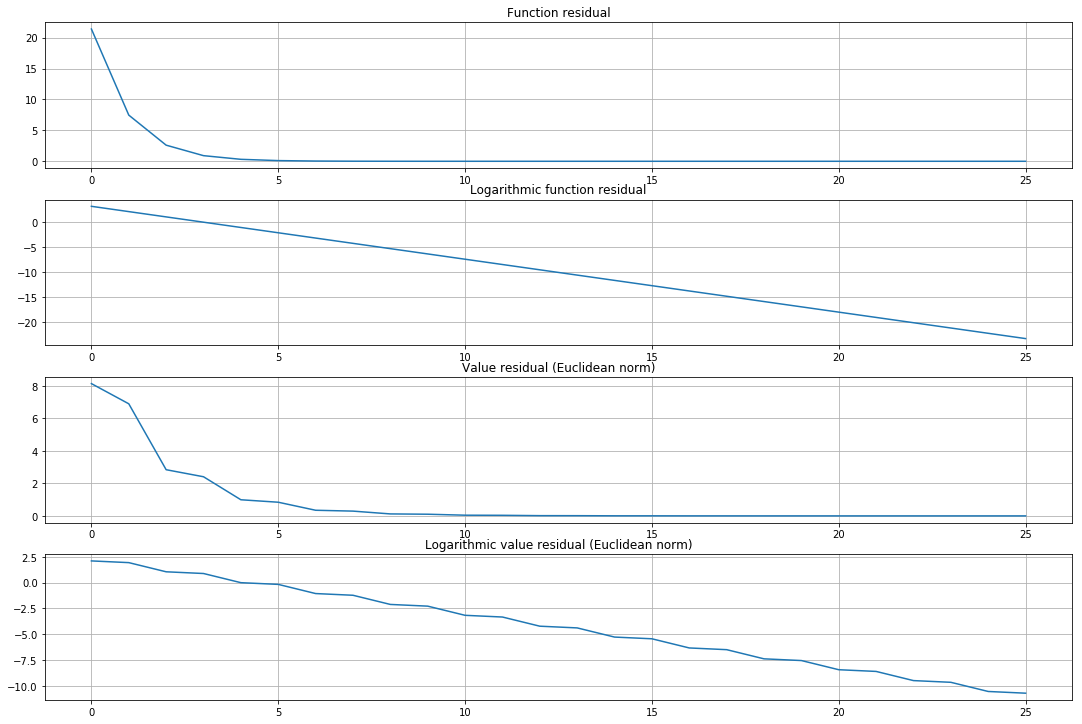

In [5]:
# prepare image
_, axes = plt.subplots(1, 1, figsize=(10,6))
# plot contours
X, Y = np.meshgrid(np.linspace(-5, 15, 400), np.linspace(-10, 3, 100))
Z_quad = quad_2d_XY(Q, b, X, Y)

# some step-size
gamma = 0.6
# levels for contour lines
levels = quad(Q, b, x_star) + np.linspace(0, 10, 6)**2

# on both sub-plots plot:
# for k in (0, 1):
# having equal axes is important to see if lines orthogonal or not
axes.axis('equal')
axes.set_title("Convergence plot")
axes.set_xlabel("X")
axes.set_ylabel("Y")
# minimum
axes.plot(x_star[0], x_star[1], '*')
# initial point
axes.plot(x_0[0], x_0[1], 'or')
# a segment in anti-gradient direction
# plot contour lines
axes.contour(X, Y, Z_quad, levels)


alg_data = gradient_descend_line_search(x_0, quad, quad_grad, Q, b)

# convert list of vectors to 2D-array of dimension N x 2
x_data = np.array(alg_data['x_k'])
# plot on second image
axes.plot(x_data[:, 0], x_data[:, 1],) 


print('Function value in optimal point (minimum), f* = {}'.format( quad(Q, b, x_star)) )
# plt.show() - not needed if %matplotlib magic is used

# additionaly build extra plots for convergence rates
_, axes = plt.subplots(4, 1, figsize=(15, 10))
plt.tight_layout()
# grids on all subplots
for m in range(4):
    axes[m].grid()

j = 1
# residual f(x_k) - f* (with broadcasting)
f_k_residual = alg_data['f_k'] - quad(Q, b, x_star)
N = len(f_k_residual)

# calculate residuals for vectors x_k - x* by two ways:
# 1 - by dubbing x* and subtracting arrays of the same size
x_k_residual = x_data - np.kron(np.ones( (N, 1) ), x_star)
# 2 - by broadcasting
x_k_residual_copy = x_data - np.atleast_2d(x_star)
# check identity of the arrays
np.testing.assert_array_equal(x_k_residual_copy, x_k_residual)

axes[0].set_title('Function residual')
axes[0].plot(f_k_residual, ) 
axes[1].set_title('Logarithmic function residual')
axes[1].plot(np.log(f_k_residual), ) 
axes[2].set_title('Value residual (Euclidean norm)')
axes[2].plot(np.arange(N), np.linalg.norm(x_k_residual, axis=1))
axes[3].set_title('Logarithmic value residual (Euclidean norm)')
axes[3].plot(np.arange(N), np.log(np.linalg.norm(x_k_residual, axis=1)) );

#### Task 1b

In [6]:
def golden_section(a0,b0,eps,func): 
    k=0
    golden_constant = (3 - math.sqrt(5)) / 2 
    y = a0 + golden_constant * (b0 - a0) 
    z = a0 + b0 - y
    while True:
        f_y = func(y) 
        f_z = func(z) 
        if f_y <= f_z:
            b0 = z 
            y = a0 + b0 - y
            z=y
        elif f_y > f_z:
            a0 = y
            y=z 
            z = a0 + b0 - z
        delta = math.fabs(a0 - b0) 
        if delta <= eps:
            return (a0 + b0) / 2 
        else:
            k += 1

In [7]:
def gradient_descend_golden_section(x0, func, func_grad, Q, b, eps=1e-3):
    x_val = []
    y_val = []
    x = x0.copy()
    old_x = x0.copy()
    x_val.append(x)
    y_val.append(func(Q,b,x))
    iteration = 1
    while True:
        optim_func = lambda gamma: (Q @ (x + gamma * func_grad(Q,b,x)) @ (x + gamma * func_grad(Q,b,x))) + \
        b @ (x + gamma * func_grad(Q,b,x))
        alpha = golden_section(-3, 3, 0.03, optim_func)
        alpha = (func_grad(Q,b,x).T @ func_grad(Q,b,x)) / (func_grad(Q,b,x).T @ Q @ func_grad(Q,b,x))
        old_x = x.copy()
        x = x - alpha * func_grad(Q,b,x)
        x_val.append(x)
        y_val.append(func(Q,b,x))
        iteration += 1
        if np.linalg.norm(x-old_x) < eps:
            print("The number of interations: ", iteration)
            return {"x_k": x_val, "f_k": y_val}

The first five points and function values and the last five points and function values are provided below in the table.

In [8]:
df = pd.DataFrame(data=gradient_descend_golden_section(x_0, quad, quad_grad, Q, b))

with pd.option_context('display.max_rows',10):
    print(display(df))

The number of interations:  18


,x_k,f_k
0,"[-3.316002589365503, -2.417495571619972]",13.998974
1,"[-1.18874583076534, -0.29995147868685246]",0.066793
2,"[1.8909818794788507, -3.3938051595282865]",-4.797307
3,"[2.633664525169609, -2.654513467094651]",-6.495495
4,"[3.708880440974916, -3.7346611398088005]",-7.088378
...,...,...
13,"[4.673362319986621, -3.910944474837839]",-7.406375
14,"[4.67893947226843, -3.916547208176336]",-7.406391
15,"[4.680284413965155, -3.9152084072376496]",-7.406397
16,"[4.682231548082997, -3.9171644723915677]",-7.406399


None


The number of interations:  18
Function value in optimal point (minimum), f* = -7.406399665468871


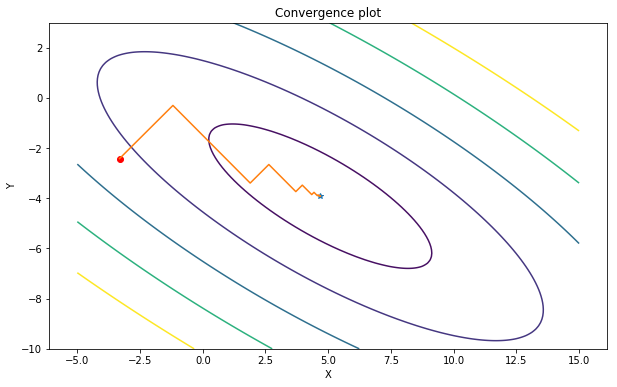

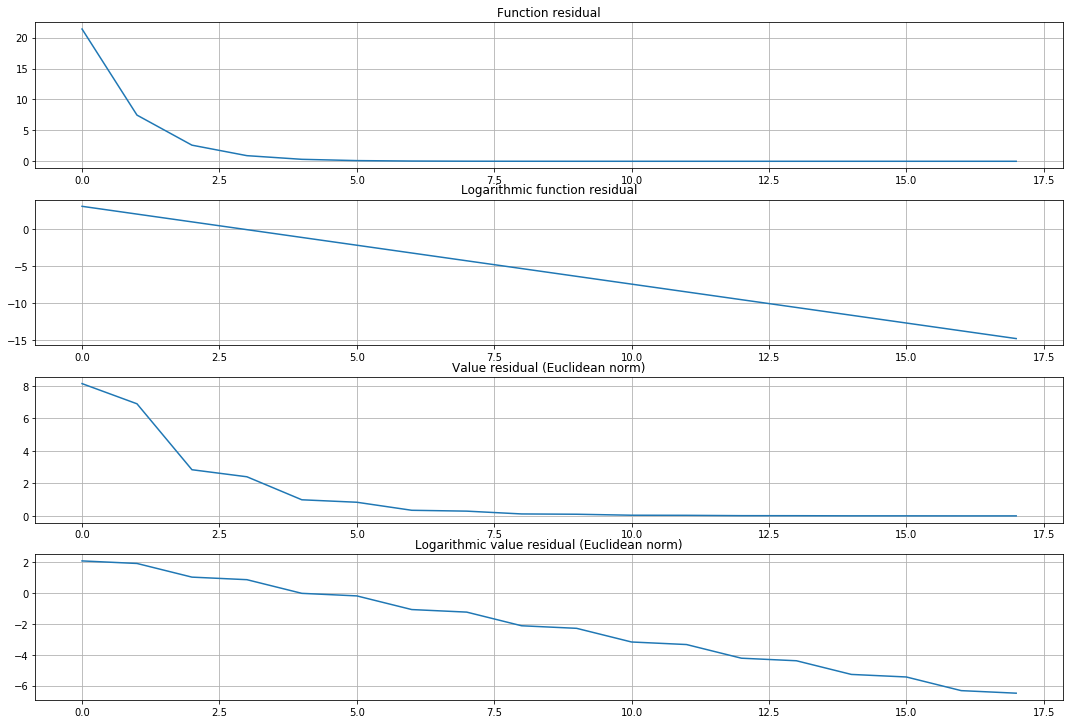

In [9]:
# prepare image
_, axes = plt.subplots(1, 1, figsize=(10,6))
# plot contours
X, Y = np.meshgrid(np.linspace(-5, 15, 400), np.linspace(-10, 3, 100))
Z_quad = quad_2d_XY(Q, b, X, Y)

# some step-size
gamma = 0.6
# levels for contour lines
levels = quad(Q, b, x_star) + np.linspace(0, 10, 6)**2

# on both sub-plots plot:
# for k in (0, 1):
# having equal axes is important to see if lines orthogonal or not
axes.axis('equal')
axes.set_title("Convergence plot")
axes.set_xlabel("X")
axes.set_ylabel("Y")
# minimum
axes.plot(x_star[0], x_star[1], '*')
# initial point
axes.plot(x_0[0], x_0[1], 'or')
# a segment in anti-gradient direction
# plot contour lines
axes.contour(X, Y, Z_quad, levels)


alg_data = gradient_descend_golden_section(x_0, quad, quad_grad, Q, b)

# convert list of vectors to 2D-array of dimension N x 2
x_data = np.array(alg_data['x_k'])
# plot on second image
axes.plot(x_data[:, 0], x_data[:, 1],) 


print('Function value in optimal point (minimum), f* = {}'.format( quad(Q, b, x_star)) )
# plt.show() - not needed if %matplotlib magic is used

# additionaly build extra plots for convergence rates
_, axes = plt.subplots(4, 1, figsize=(15, 10))
plt.tight_layout()
# grids on all subplots
for m in range(4):
    axes[m].grid()

j = 1
# residual f(x_k) - f* (with broadcasting)
f_k_residual = alg_data['f_k'] - quad(Q, b, x_star)
N = len(f_k_residual)

# calculate residuals for vectors x_k - x* by two ways:
# 1 - by dubbing x* and subtracting arrays of the same size
x_k_residual = x_data - np.kron(np.ones( (N, 1) ), x_star)
# 2 - by broadcasting
x_k_residual_copy = x_data - np.atleast_2d(x_star)
# check identity of the arrays
np.testing.assert_array_equal(x_k_residual_copy, x_k_residual)

axes[0].set_title('Function residual')
axes[0].plot(f_k_residual, ) 
axes[1].set_title('Logarithmic function residual')
axes[1].plot(np.log(f_k_residual), ) 
axes[2].set_title('Value residual (Euclidean norm)')
axes[2].plot(np.arange(N), np.linalg.norm(x_k_residual, axis=1))
axes[3].set_title('Logarithmic value residual (Euclidean norm)')
axes[3].plot(np.arange(N), np.log(np.linalg.norm(x_k_residual, axis=1)) );

#### Task 1c

In [10]:
def armijo(func, grad, Q, b, x, sigma=0.5):
    l = 0
    alpha = 2
    nu = 0.5
#     first_expr = func(x + alpha * grad(x))
#     second_expr = func(x) + sigma * alpha * np.transpose(grad(x)) @ grad(x)
    while func(Q, b, x - alpha * grad(Q, b, x)) > (func(Q, b, x) - sigma * alpha * np.transpose(grad(Q, b, x)) @ grad(Q, b, x)):
        alpha = alpha * nu
        l += 1
    return alpha

In [11]:
def gradient_descend_armijo(x0, func, func_grad, Q, b, eps=1e-8):
    x_val = []
    y_val = []
    x = x0.copy()
    old_x = x0.copy()
    x_val.append(x)
    y_val.append(func(Q,b,x))

    iteration = 1
    while True:
#         optim_func = lambda gamma: (Q @ (x + gamma * func_grad(Q,b,x)) @ (x + gamma * func_grad(Q,b,x))) + \
#         b @ (x + gamma * func_grad(Q,b,x))
#         alpha = minimize_scalar(optim_func).x
#         alpha = goldenSectionSearch(optim_func, -5, (-1 + resphi*2), 5, 1e-3)
#         alpha = golden(optim_func, 0, 3, 0.03)
        alpha = armijo(func, func_grad, Q, b, x)
#         print(alpha)
#         break
#         alpha = (func_grad(Q,b,x).T @ func_grad(Q,b,x)) / (func_grad(Q,b,x).T @ Q @ func_grad(Q,b,x))
        old_x = x.copy()
        x = x - alpha * func_grad(Q,b,x)
        x_val.append(x)
        y_val.append(func(Q,b,x))
        iteration += 1
        if np.linalg.norm(x-old_x) < eps:
            print(iteration)
            return {"x_k": x_val, "f_k": y_val}

The first five points and function values and the last five points and function values are provided below in the table.

In [12]:
df = pd.DataFrame(data=gradient_descend_armijo(x_0, quad, quad_grad, Q, b))

with pd.option_context('display.max_rows',10):
    print(display(df))

81


,x_k,f_k
0,"[-3.316002589365503, -2.417495571619972]",13.998974
1,"[-1.6711684603346864, -0.7801714546779319]",0.783323
2,"[-0.31731880458605466, -0.6481429985370684]",-1.687672
3,"[0.2300437410434767, -1.5600038034126962]",-3.381199
4,"[1.9222193269956342, -1.777832351100524]",-5.184068
...,...,...
76,"[4.683997225916546, -3.9174954699550035]",-7.406400
77,"[4.683997291055802, -3.9174954888706623]",-7.406400
78,"[4.6839973011777705, -3.917495516486402]",-7.406400
79,"[4.683997346390985, -3.9174955147269483]",-7.406400


None


81
Function value in optimal point (minimum), f* = -7.406399665468871


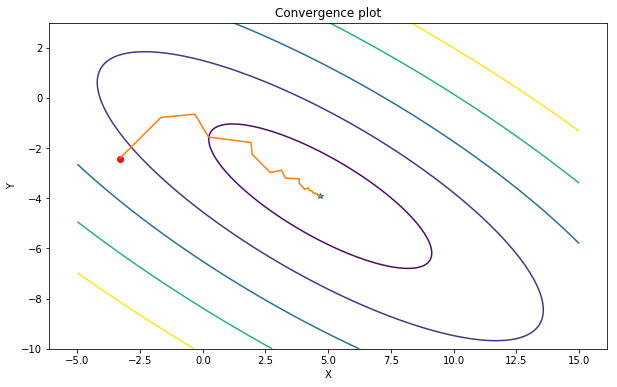

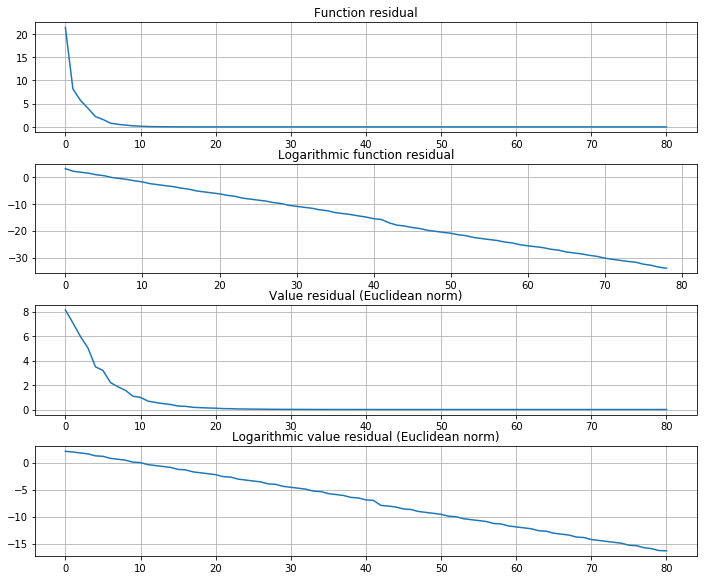

In [13]:
# prepare image
_, axes = plt.subplots(1, 1, figsize=(10,6))
# plot contours
X, Y = np.meshgrid(np.linspace(-5, 15, 400), np.linspace(-10, 3, 100))
Z_quad = quad_2d_XY(Q, b, X, Y)

# some step-size
gamma = 0.6
# levels for contour lines
levels = quad(Q, b, x_star) + np.linspace(0, 10, 6)**2

# on both sub-plots plot:
# for k in (0, 1):
# having equal axes is important to see if lines orthogonal or not
axes.axis('equal')
axes.set_title("Convergence plot")
axes.set_xlabel("X")
axes.set_ylabel("Y")
# minimum
axes.plot(x_star[0], x_star[1], '*')
# initial point
axes.plot(x_0[0], x_0[1], 'or')
# a segment in anti-gradient direction
# plot contour lines
axes.contour(X, Y, Z_quad, levels)



alg_data = gradient_descend_armijo(x_0, quad, quad_grad, Q, b)

# convert list of vectors to 2D-array of dimension N x 2
x_data = np.array(alg_data['x_k'])
# plot on second image
axes.plot(x_data[:, 0], x_data[:, 1],) 


print('Function value in optimal point (minimum), f* = {}'.format( quad(Q, b, x_star)) )
# plt.show() - not needed if %matplotlib magic is used

# additionaly build extra plots for convergence rates
_, axes = plt.subplots(4, 1, figsize=(10, 8))
plt.tight_layout()
# grids on all subplots
for m in range(4):
    axes[m].grid()

j = 1
# residual f(x_k) - f* (with broadcasting)
f_k_residual = alg_data['f_k'] - quad(Q, b, x_star)
N = len(f_k_residual)

# calculate residuals for vectors x_k - x* by two ways:
# 1 - by dubbing x* and subtracting arrays of the same size
x_k_residual = x_data - np.kron(np.ones( (N, 1) ), x_star)
# 2 - by broadcasting
x_k_residual_copy = x_data - np.atleast_2d(x_star)
# check identity of the arrays
np.testing.assert_array_equal(x_k_residual_copy, x_k_residual)

axes[0].set_title('Function residual')
axes[0].plot(f_k_residual, ) 
axes[1].set_title('Logarithmic function residual')
axes[1].plot(np.log(f_k_residual), ) 
axes[2].set_title('Value residual (Euclidean norm)')
axes[2].plot(np.arange(N), np.linalg.norm(x_k_residual, axis=1))
axes[3].set_title('Logarithmic value residual (Euclidean norm)')
axes[3].plot(np.arange(N), np.log(np.linalg.norm(x_k_residual, axis=1)) );

TASK 2a

In [14]:
e = np.array([
    [1., 0.],
    [0., 1.]
])

In [15]:
def coordinate_descend_exact_line_search(x0, func, func_grad, Q, b, eps=1e-8):
    x_val = []
    y_val = []
    x = x0.copy()
    alpha = 1.
    old_x = x0.copy()
    k = 1.
    x_val.append(x0)
    y_val.append(func(Q,b,x0))
    
    iteration = 1
    while True:
        old_x = x.copy()
        for i in range(2):
            optim_func = lambda gamma: (Q @ (x + gamma * e[i]) @ (x + gamma * e[i])) + b @ (x + gamma * e[i])
            alpha = (e[i].T @ e[i]) / (e[i].T @ Q @ e[i])
            x[i] = x[i] - alpha * func_grad(Q,b,x)[i]
            x_ = x.copy()
            x_val.append(x_)
            y_val.append(func(Q,b,x_))
            iteration += 1
        if np.linalg.norm(x-old_x) < eps:
            print(iteration)
#             return x_val
#             break
            return {"x_k": x_val, "f_k": y_val}

The first five points and function values and the last five points and function values are provided below in the table.

In [16]:
df = pd.DataFrame(data=coordinate_descend_exact_line_search(x_0, quad, quad_grad, Q, b))

with pd.option_context('display.max_rows',10):
    print(display(df))

81


,x_k,f_k
0,"[-3.316002589365503, -2.417495571619972]",13.998974
1,"[2.860906965986122, -2.417495571619972]",-6.321009
2,"[2.860906965986122, -2.987655709943067]",-6.733573
3,"[3.5538759660502754, -2.987655709943067]",-6.989319
4,"[3.5538759660502754, -3.341094126044422]",-7.147854
...,...,...
76,"[4.6839973729178075, -3.9174955523831425]",-7.406400
77,"[4.683997387254176, -3.9174955523831425]",-7.406400
78,"[4.683997387254176, -3.9174955596951917]",-7.406400
79,"[4.683997396141194, -3.9174955596951917]",-7.406400


None


81
Function value in optimal point (minimum), f* = -7.406399665468871


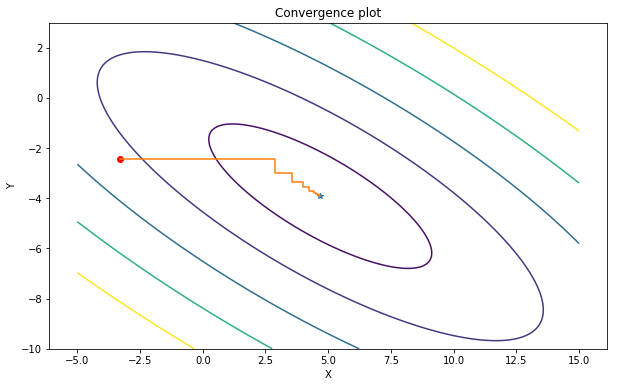

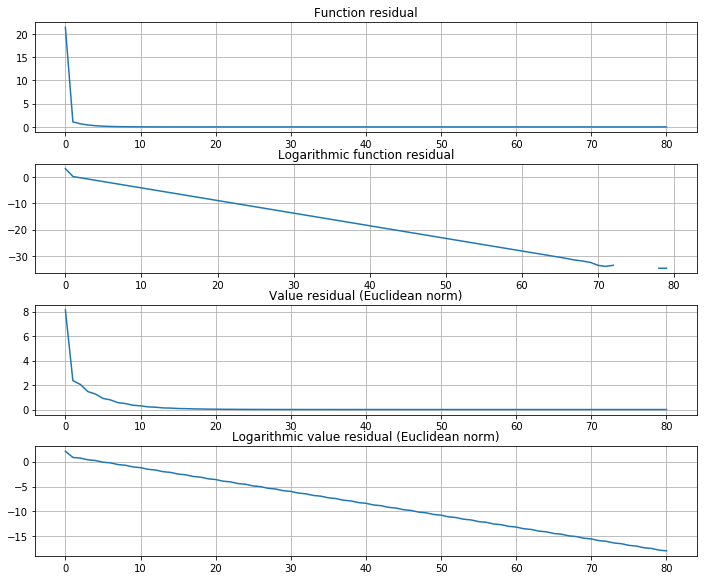

In [17]:
# prepare image
_, axes = plt.subplots(1, 1, figsize=(10,6))
# plot contours
X, Y = np.meshgrid(np.linspace(-5, 15, 400), np.linspace(-10, 3, 100))
Z_quad = quad_2d_XY(Q, b, X, Y)

# some step-size
gamma = 0.6
# levels for contour lines
levels = quad(Q, b, x_star) + np.linspace(0, 10, 6)**2

# on both sub-plots plot:
# for k in (0, 1):
# having equal axes is important to see if lines orthogonal or not
axes.axis('equal')
axes.set_title("Convergence plot")
axes.set_xlabel("X")
axes.set_ylabel("Y")
# minimum
axes.plot(x_star[0], x_star[1], '*')
# initial point
axes.plot(x_0[0], x_0[1], 'or')
# a segment in anti-gradient direction
# plot contour lines
axes.contour(X, Y, Z_quad, levels)

alg_data = coordinate_descend_exact_line_search(x_0, quad, quad_grad, Q, b)

# convert list of vectors to 2D-array of dimension N x 2
x_data = np.array(alg_data['x_k'])
# plot on second image
axes.plot(x_data[:, 0], x_data[:, 1],) 


print('Function value in optimal point (minimum), f* = {}'.format( quad(Q, b, x_star)) )
# plt.show() - not needed if %matplotlib magic is used

# additionaly build extra plots for convergence rates
_, axes = plt.subplots(4, 1, figsize=(10, 8))
plt.tight_layout()
# grids on all subplots
for m in range(4):
    axes[m].grid()

j = 1
# residual f(x_k) - f* (with broadcasting)
f_k_residual = alg_data['f_k'] - quad(Q, b, x_star)
N = len(f_k_residual)

# calculate residuals for vectors x_k - x* by two ways:
# 1 - by dubbing x* and subtracting arrays of the same size
x_k_residual = x_data - np.kron(np.ones( (N, 1) ), x_star)
# 2 - by broadcasting
x_k_residual_copy = x_data - np.atleast_2d(x_star)
# check identity of the arrays
np.testing.assert_array_equal(x_k_residual_copy, x_k_residual)

axes[0].set_title('Function residual')
axes[0].plot(f_k_residual, ) 
axes[1].set_title('Logarithmic function residual')
axes[1].plot(np.log(f_k_residual), ) 
axes[2].set_title('Value residual (Euclidean norm)')
axes[2].plot(np.arange(N), np.linalg.norm(x_k_residual, axis=1))
axes[3].set_title('Logarithmic value residual (Euclidean norm)')
axes[3].plot(np.arange(N), np.log(np.linalg.norm(x_k_residual, axis=1)) );

In [18]:
def fibonacci_number(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci_number(n - 1) + fibonacci_number(n - 2)

In [19]:
def fibonacci_optimization(a0, b0, l, eps, func, max_iterations):
    assert l > 0
    assert eps > 0
    current_sector = [a0, b0]
    sector_size = math.fabs(current_sector[1] - current_sector[0])
    numbers = [1, 1]
    # Step 2
    while numbers[-1] < (math.fabs(sector_size) / l):
        numbers.append(numbers[-1] + numbers[-2])
    # Step 3
    k = 0
    N = len(numbers)
    # Step 4
    x1 = current_sector[0] + numbers[-3] / numbers[-1] * (current_sector[1] - current_sector[0])
    x2 = current_sector[0] + numbers[-2] / numbers[-1] * (current_sector[1] - current_sector[0])
    ######################
    
    iterations = 0
    # Step 5
    while True:
#         func_y = func(y)
#         func_z = func(z)
        # Step 6
        if func(x2) > func(x1):
            current_sector[1] = x2
#             current_sector[1] = z
#             z = y
#             y = current_sector[0] + func(- k - 3) / func(- k - 2) * (current_sector[1] - current_sector[0])
        else:
            current_sector[0] = x1
#             y = z
#             z = current_sector[0] + func(- k - 2) / func(- k - 2) * (current_sector[1] - current_sector[0])
#         if k != N - 3:
#             k += 1
#             continue
#         else:
#             k += 1
#             z = y + eps
#             break
        if max_iterations >= N:
            return math.fabs(current_sector[1] - current_sector[0])/2

In [22]:
def coordinate_descend_fibonacci(x0, func, func_grad, Q, b, eps=1e-7):
    x_val = []
    y_val = []
    max_iterations = 30
    
    x = x0.copy()
    alpha = 1.
    old_x = x0.copy()
    k = 1.
    iteration = 1
    
    x_val.append(x0)
    y_val.append(func(Q,b,x0))
    while True:
        old_x = x.copy()
        for i in range(2):
            optim_func = lambda gamma: (Q @ (x + gamma * e[i]) @ (x + gamma * e[i])) + b @ (x + gamma * e[i])
            alpha = fibonacci_optimization(-1.,1., 0.001, 0.01, optim_func, max_iterations)
            x[i] = x[i] - alpha * func_grad(Q,b,x) @ e[i]
            x_ = x.copy()
            x_val.append(x_)
            y_val.append(func(Q,b,x_))
            iteration += 1
#         print(len(x_values))
        if np.linalg.norm(x-old_x) < eps:
#             return x_val
            print("The iteration is ", iteration)
            return {'x_k' : x_val, 'f_k' : y_val}

The first five points and function values and the last five points and function values are provided below in the table.

In [23]:
df = pd.DataFrame(data=coordinate_descend_fibonacci(x_0, quad, quad_grad, Q, b))

with pd.option_context('display.max_rows',10):
    print(display(df))

The iteration is  97


,x_k,f_k
0,"[-3.316002589365503, -2.417495571619972]",13.998974
1,"[0.7502514416905557, -2.417495571619972]",-3.948458
2,"[0.7502514416905557, -1.623186823460814]",-4.168606
3,"[1.5041735813069583, -1.623186823460814]",-4.785579
4,"[1.5041735813069583, -2.6781187726421454]",-5.173894
...,...,...
92,"[4.683997103373938, -3.917495436557008]",-7.406400
93,"[4.683997197580418, -3.917495436557008]",-7.406400
94,"[4.683997197580418, -3.9174954779674867]",-7.406400
95,"[4.683997262903072, -3.9174954779674867]",-7.406400


None


The iteration is  97
Function value in optimal point (minimum), f* = -7.406399665468871


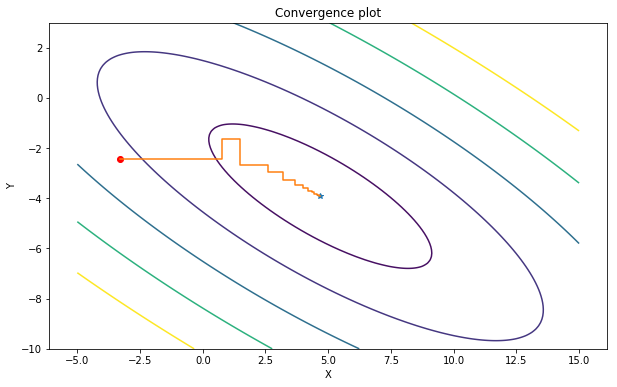

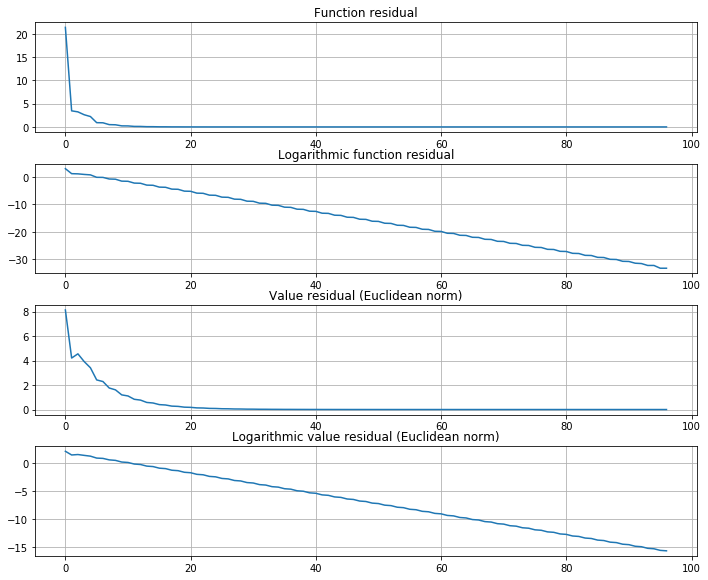

In [24]:
# prepare image
_, axes = plt.subplots(1, 1, figsize=(10,6))
# plot contours
X, Y = np.meshgrid(np.linspace(-5, 15, 400), np.linspace(-10, 3, 100))
Z_quad = quad_2d_XY(Q, b, X, Y)

# some step-size
gamma = 0.6
# levels for contour lines
levels = quad(Q, b, x_star) + np.linspace(0, 10, 6)**2

# on both sub-plots plot:
# for k in (0, 1):
# having equal axes is important to see if lines orthogonal or not
axes.axis('equal')
axes.set_title("Convergence plot")
axes.set_xlabel("X")
axes.set_ylabel("Y")
# minimum
axes.plot(x_star[0], x_star[1], '*')
# initial point
axes.plot(x_0[0], x_0[1], 'or')
# a segment in anti-gradient direction
# plot contour lines
axes.contour(X, Y, Z_quad, levels)

alg_data = coordinate_descend_fibonacci(x_0, quad, quad_grad, Q, b)

# convert list of vectors to 2D-array of dimension N x 2
x_data = np.array(alg_data['x_k'])
# plot on second image
axes.plot(x_data[:, 0], x_data[:, 1],) 


print('Function value in optimal point (minimum), f* = {}'.format( quad(Q, b, x_star)) )
# plt.show() - not needed if %matplotlib magic is used

# additionaly build extra plots for convergence rates
_, axes = plt.subplots(4, 1, figsize=(10, 8))
plt.tight_layout()
# grids on all subplots
for m in range(4):
    axes[m].grid()

j = 1
# residual f(x_k) - f* (with broadcasting)
f_k_residual = alg_data['f_k'] - quad(Q, b, x_star)
N = len(f_k_residual)

# calculate residuals for vectors x_k - x* by two ways:
# 1 - by dubbing x* and subtracting arrays of the same size
x_k_residual = x_data - np.kron(np.ones( (N, 1) ), x_star)
# 2 - by broadcasting
x_k_residual_copy = x_data - np.atleast_2d(x_star)
# check identity of the arrays
np.testing.assert_array_equal(x_k_residual_copy, x_k_residual)

axes[0].set_title('Function residual')
axes[0].plot(f_k_residual, ) 
axes[1].set_title('Logarithmic function residual')
axes[1].plot(np.log(f_k_residual), ) 
axes[2].set_title('Value residual (Euclidean norm)')
axes[2].plot(np.arange(N), np.linalg.norm(x_k_residual, axis=1))
axes[3].set_title('Logarithmic value residual (Euclidean norm)')
axes[3].plot(np.arange(N), np.log(np.linalg.norm(x_k_residual, axis=1)) );

#### TASK 2

$$ F=\sum_{t=0}^{N-1}f(u(t)) $$

Let's rewrite given equation in the next form: $$ g=\sum_{t=0}^{N-1}f(u(t)) $$

So our task is: $$ \min g $$

Using $x(0)=0 \text{ and } x(N) = x_des$, there are the follwoing expressions:

$x(1) = bu(0)$

$x(2) = Abu(0) + bu(1)$

$...$

$x(N) = A^{N-1}bu(0) + A^{N-2}bu(1) + ... + Abu(N-1) + bu(N-1) = x_{des}$

Let's define the matrix M:

$$M = [A^{N-1}b \text{ } A^{N-2}b ... Ab \text{ } b]$$

Hence,

$$M^Tu = x_{des}$$

Let us introduce a new variable $t$ such that:
\begin{align}
    & |a| \leqslant t
    \\
    & 2|a|-1 \leqslant t
\end{align}

So in this case: $$ -t \leqslant a \leqslant t $$

As we know $u=a$, we can present an optimization problem:
\begin{align}
    & \min 1^{T}g
    \\
    & M^{T}u = x_{des}
    \\
    & -t \leqslant u \leqslant t
    \\
    & u \leqslant t
    \\
    & 2u-1 \leqslant t
\end{align}

### 2.

In [0]:
import cvxpy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
def optimize(A, b, x_des, N):
    n = 3
    np.random.seed(42)
    x_0 = np.zeros((n, 1))
    X = cvxpy.Variable(n, N)
    u = cvxpy.Variable(1, N)
    constraints = [X[:, 1:N] == A*X[:, :N-1] + b*u[:N-1], 
               X[:, 0] == x_0,
               X[:, N-1] == x_des.T]
    objective = cvxpy.Minimize(cvxpy.sum_entries(cvxpy.max_elemwise(cvxpy.abs(u), 2*cvxpy.abs(u)-1)))
    prob = cvxpy.Problem(objective, constraints)
    prob.solve()
    return X, u, prob.value

In [0]:
N = 30

A = np.array([[-1, 0.4, 0.8],
              [1, 0, 0],
              [0, 1, 0]])

b = np.array([1, 0, 0.3])

x_des = np.array([[7, 2, -6]])


In [0]:
X, u, result = optimize(A, b, x_des, N)

In [0]:
us = np.array(u.value).reshape(N,)

In [0]:
t = np.linspace(0, N-1, num=N)

In [75]:
print('The optimal value for the task is: ', result)

The optimal value for the task is:  17.323567852116312


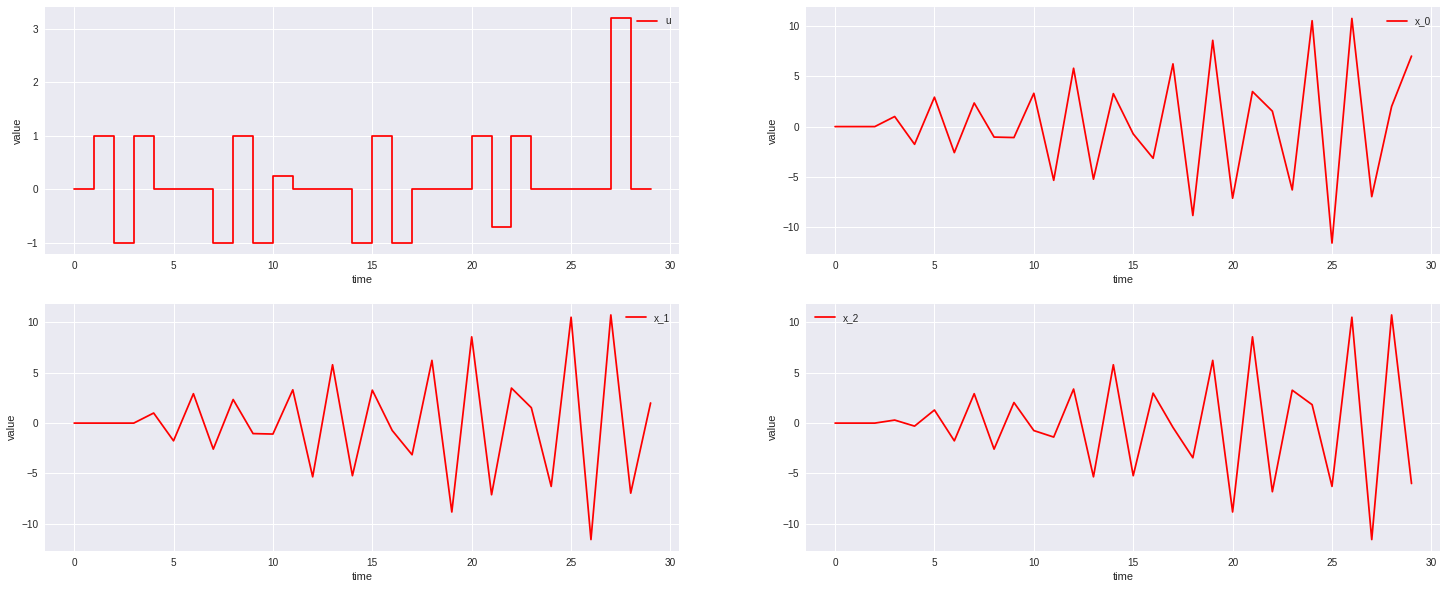

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(25,10))

# axes[0].title('The optimal value for the task is: ', result)
axes[0,0].step(t, us, label='u', color='red')
axes[0,0].set_xlabel('time')
axes[0,0].set_ylabel('value')
axes[0,0].legend()

D = np.array(X.value)
axes[0,1].plot(t, D[0], label='x_0', color='red')
axes[0,1].set_xlabel('time')
axes[0,1].set_ylabel('value')
axes[0,1].legend()

axes[1,0].plot(t, D[1], label='x_1', color='red')
axes[1,0].set_xlabel('time')
axes[1,0].set_ylabel('value')
axes[1,0].legend()

axes[1,1].plot(t, D[2], label='x_2', color='red')
axes[1,1].set_xlabel('time')
axes[1,1].set_ylabel('value')
axes[1,1].legend()

### 3.

To look at the sensitivity let us change the one of the value of the $x_{des}$ by one, e.i. increase by one.

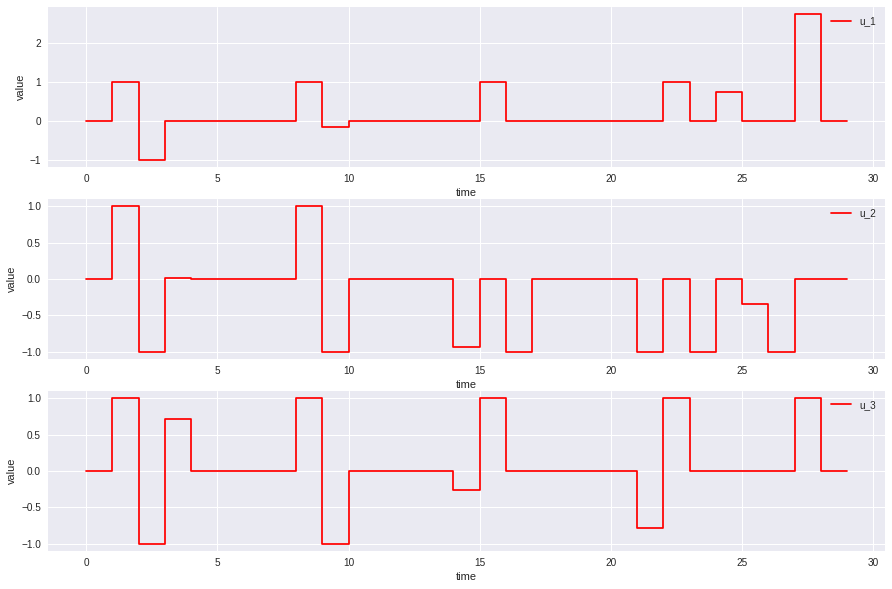

In [77]:
fig, axes = plt.subplots(3, 1, figsize=(15,10))
x_des_1 = np.array([[4, 2, -3]])
X_1, u_1, result_1 = optimize(A, b, x_des_1, N)
us_1 = np.array(u_1.value).reshape(30,)
axes[0].step(t, us_1, label='u_1', color='red')
axes[0].set_xlabel('time')
axes[0].set_ylabel('value')
axes[0].legend()

x_des_2 = np.array([[2, 1, -6]])
X_2, u_2, result_2 = optimize(A, b, x_des_2, N)
us_2 = np.array(u_2.value).reshape(30,)
axes[1].step(t, us_2, label='u_2', color='red')
axes[1].set_xlabel('time')
axes[1].set_ylabel('value')
axes[1].legend()

x_des_3 = np.array([[3, 2, -5]])
X_3, u_3, result_3 = optimize(A, b, x_des_3, N)
us_3 = np.array(u_3.value).reshape(30,)
axes[2].step(t, us_3, label='u_3', color='red')
axes[2].set_xlabel('time')
axes[2].set_ylabel('value')
axes[2].legend()

Also there is a need to check the sensitivity by perturbing $x_{des}$.

In [0]:
import pandas as pd
from IPython import display

In [0]:
dataframe = pd.DataFrame(data={
    'x_des': [x_des_1, x_des_2, x_des_3],
    'Lagrangian multiplier': [result - result_1, result - result_2, result - result_3]
})

In [86]:
print(dataframe)

   Lagrangian multiplier         x_des
0               6.929752  [[4, 2, -3]]
1               8.028300  [[2, 1, -6]]
2               8.561348  [[3, 2, -5]]
